In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ovl_plugins.fusion.fusion import fuse

In [2]:
lores = np.load('../ovl_plugins/tests/testdata/lores.npz')['arr_0']
hires = np.load('../ovl_plugins/tests/testdata/hires.npz')['arr_0']

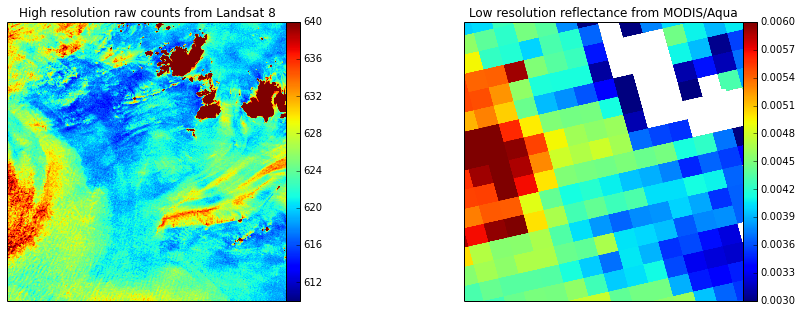

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(hires[3, :, :], vmin=610, vmax=640)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
plt.title('High resolution raw counts from Landsat 8')

plt.subplot(1,2,2)
plt.imshow(lores, vmin=0.003, vmax=0.006)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
t=plt.title('Low resolution reflectance from MODIS/Aqua')

In [4]:
hires_fused = fuse(hires, lores,
                   network_name='../ovl_plugins/tests/testdata/testnet.bin',
                   iterations=15, threads=7)

Creating training datasets from input data ...  OK!
Training network in 15 iterations ...
Train network
### -> RMSE
000 -> 0.220
001 -> 0.219
002 -> 0.219
003 -> 0.218
004 -> 0.219
005 -> 0.217
006 -> 0.212
007 -> 0.197
008 -> 0.181
009 -> 0.173
010 -> 0.168
011 -> 0.167
012 -> 0.164
013 -> 0.161
014 -> 0.157
Training network - OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network


/home/antonk/py/ovl_plugins/ovl_plugins/fusion/fusion.py:114: RuntimeWarning: invalid value encountered in less
  nnData[nnData < 0] = np.nan
/home/antonk/py/ovl_plugins/ovl_plugins/fusion/fusion.py:115: RuntimeWarning: invalid value encountered in greater
  nnData[nnData > 1] = np.nan


OK!


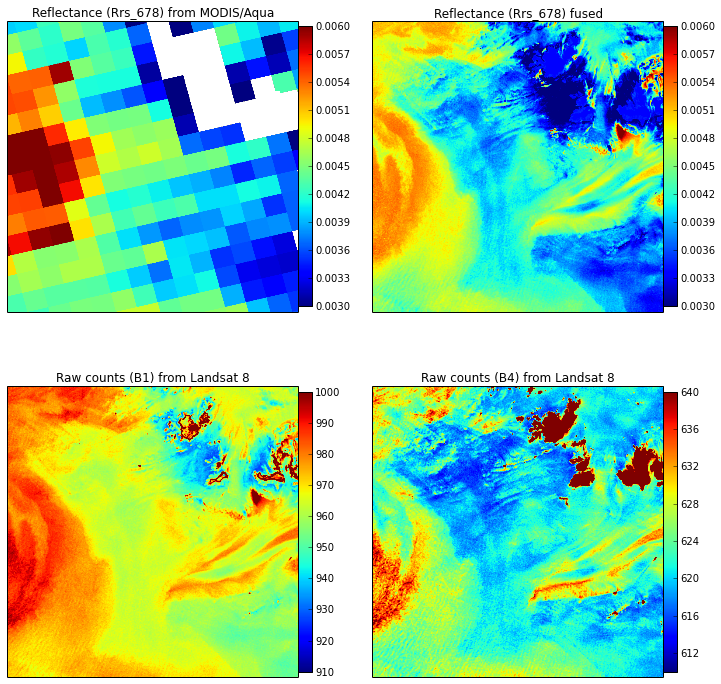

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(lores, vmin=0.003, vmax=0.006)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
t=plt.title('Reflectance (Rrs_678) from MODIS/Aqua')

plt.subplot(2,2,2)
plt.imshow(hires_fused, vmin=0.003, vmax=0.006)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
t=plt.title('Reflectance (Rrs_678) fused')

plt.subplot(2,2,3)
plt.imshow(hires[0, :, :], vmin=910, vmax=1000)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
plt.title('Raw counts (B1) from Landsat 8')

plt.subplot(2,2,4)
plt.imshow(hires[3, :, :], vmin=610, vmax=640)
plt.colorbar(fraction=0.046, pad=0);plt.xticks([]);plt.yticks([])
plt.title('Raw counts (B4) from Landsat 8')
